
# Sales ROI Analysis

This notebook calculates and visualizes ROI (Return on Investment) for real estate data by merging ZHVI and ZHVF datasets and performing necessary transformations.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace with your dataset paths or inputs
zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual path or input
zhvf_df = pd.read_csv('Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual path or input


In [2]:

# Ensure RegionID exists and matches in both dataframes
if 'RegionID' not in zhvi_df.columns or 'RegionID' not in zhvf_df.columns:
    raise KeyError("Both DataFrames must contain 'RegionID' for merging.")

# Merge dataframes
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')
print(f"Merged DataFrame shape: {merged_df.shape}")


Merged DataFrame shape: (894, 35)


In [3]:

# Specify columns for ZHVI (current value) and ZHVF (forecasted value)
roi_column_zhvi = '10/31/2024'  # Replace with the correct column from zhvi_df
roi_column_zhvf = '11/30/2024'  # Replace with the correct column from zhvf_df

# Check if these columns exist
if roi_column_zhvi not in merged_df.columns or roi_column_zhvf not in merged_df.columns:
    raise KeyError(f"Columns '{roi_column_zhvi}' or '{roi_column_zhvf}' do not exist in the merged DataFrame.")

# Calculate ROI
merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100
print("ROI calculation complete.")


ROI calculation complete.


In [4]:

# Remove rows with invalid ROI values
merged_df = merged_df[np.isfinite(merged_df['ROI'])]
merged_df = merged_df.dropna(subset=['ROI'])  # Drop NaN values in ROI
print(f"Cleaned DataFrame shape: {merged_df.shape}")


Cleaned DataFrame shape: (893, 36)


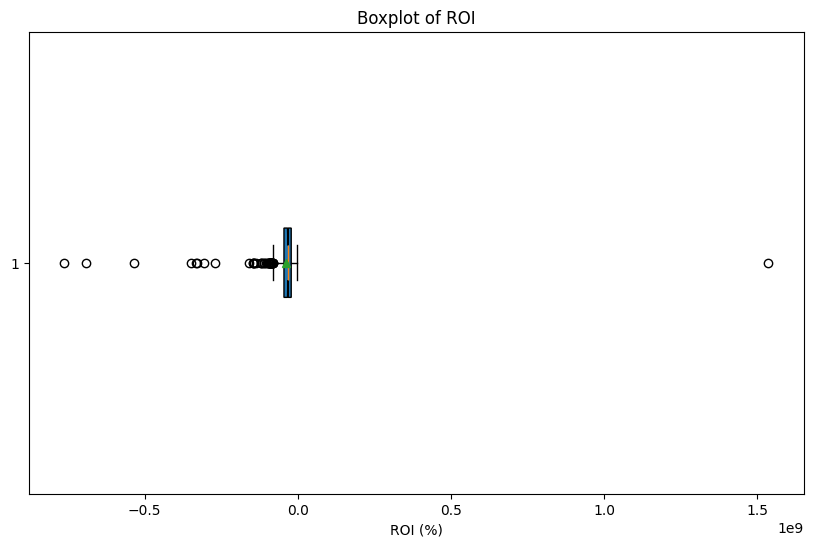

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual file path
zhvf_df = pd.read_csv('Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual file path

# Merge the datasets on 'RegionID'
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')

# Specify columns for ROI calculation
roi_column_zhvi = '10/31/2024'  # Adjust to the correct column name
roi_column_zhvf = '11/30/2024'  # Adjust to the correct column name

# Ensure the selected columns exist in the merged dataset
if roi_column_zhvi in merged_df.columns and roi_column_zhvf in merged_df.columns:
    # Calculate ROI
    merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100

    # Clean the data (remove invalid or non-finite ROI values)
    merged_df = merged_df[np.isfinite(merged_df['ROI'])].dropna(subset=['ROI'])

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(merged_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
    plt.title("Boxplot of ROI")
    plt.xlabel("ROI (%)")
    plt.show()
else:
    print(f"One or both columns '{roi_column_zhvi}' and '{roi_column_zhvf}' do not exist in the merged dataset.")


In [6]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -81024616.83333334, Upper Bound: 13659577.3888889


In [7]:
# Cap outliers at the lower and upper bounds
merged_df['ROI'] = merged_df['ROI'].clip(lower=-81024616.83333334, upper=13659577.3888889)


In [8]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = merged_df[(merged_df['ROI'] >= lower_bound) & (merged_df['ROI'] <= upper_bound)]
print(f"Data size before cleaning: {merged_df.shape[0]}, after cleaning: {cleaned_df.shape[0]}")


Data size before cleaning: 893, after cleaning: 893


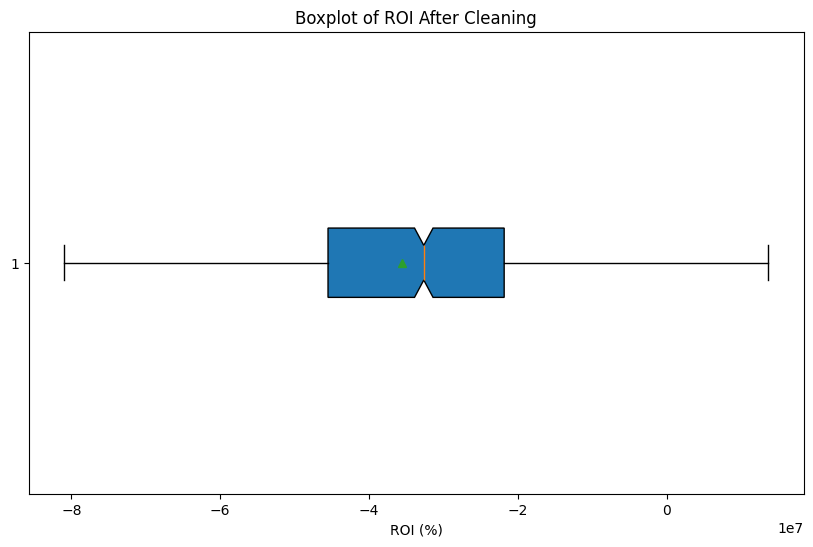

In [9]:
# Create the boxplot after cleaning
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title("Boxplot of ROI After Cleaning")
plt.xlabel("ROI (%)")
plt.show()


### Explanation 
#### Key Components of the Boxplot:

1. **Blue Box**:
   - Represents the **Interquartile Range (IQR)**, which spans the middle 50% of the data.
   - The lower edge of the box is the first quartile (Q1, 25th percentile), and the upper edge is the third quartile (Q3, 75th percentile).

2. **Horizontal Line Inside the Box**:
   - Indicates the **median (Q2)**, or the midpoint of the data distribution.

3. **Whiskers**:
   - Extend to the smallest and largest data points within 1.5 times the IQR from Q1 and Q3, respectively.
   - Points beyond the whiskers are considered outliers and have been removed during the cleaning process.

4. **Green Triangle**:
   - Represents the **mean (average)** of the ROI data after cleaning.
   - The mean provides an additional measure of central tendency and allows for comparison with the median.

#### Key Observations:
- After cleaning, the data is tightly distributed with fewer outliers, as extreme values have been removed.
- The mean (green triangle) is slightly shifted from the median (horizontal line), indicating some asymmetry in the data.

This cleaned boxplot provides a clearer and more accurate view of the ROI data distribution, making it easier to interpret and analyze trends without the distraction of extreme outliers.


### Assumptions:

#### Mortgage:
- **80% Loan-to-Value (LTV)**.
- **5% annual interest rate**.
- **30-year term**.

#### Dates used for Purchase and Sale Dates:
- **Purchase**: January 2023.
- **Sale**: September 2024.


In [10]:
sale_price_df = pd.read_csv('Metro_median_sale_price_uc_sfrcondo_month.csv')
print(sale_price_df.head())  


   RegionID  SizeRank       RegionName RegionType StateName  1/31/2023  \
0    394913         1     New York, NY        msa        NY   525000.0   
1    753899         2  Los Angeles, CA        msa        CA   805000.0   
2    394463         3      Chicago, IL        msa        IL   252500.0   
3    394514         4       Dallas, TX        msa        TX   350000.0   
4    394692         5      Houston, TX        msa        TX   294500.0   

   2/28/2023  3/31/2023  4/30/2023  5/31/2023  ...  12/31/2023  1/31/2024  \
0   510000.0   515000.0   530000.0   550000.0  ...    575000.0   570000.0   
1   824000.0   840000.0   850000.0   860000.0  ...    870000.0   865000.0   
2   259900.0   280000.0   289000.0   300000.0  ...    280000.0   279900.0   
3   367500.0   370000.0   381000.0   391000.0  ...    368000.0   368000.0   
4   300000.0   310000.0   319900.0   325000.0  ...    310000.0   306000.0   

   2/29/2024  3/31/2024  4/30/2024  5/31/2024  6/30/2024  7/31/2024  \
0   565000.0   575000

In [11]:
print(zhvi_df.columns)
print(sale_price_df.columns)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023',
       '11/30/2023', '12/31/2023', '1/31/2024', '2/29/2024', '3/31/2024',
       '4/30/2024', '5/31/2024', '6/30/2024', '7/31/2024', '8/31/2024',
       '9/30/2024', '10/31/2024'],
      dtype='object')
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023',
       '11/30/2023', '12/31/2023', '1/31/2024', '2/29/2024', '3/31/2024',
       '4/30/2024', '5/31/2024', '6/30/2024', '7/31/2024', '8/31/2024',
       '9/30/2024'],
      dtype='object')


In [12]:
zhvi_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
sale_price_df = pd.read_csv('Metro_median_sale_price_uc_sfrcondo_month.csv')


In [13]:
merged_df = zhvi_df.merge(sale_price_df, on="RegionID", suffixes=("_purchase", "_sale"))

In [14]:
print(merged_df.columns)

Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_sale', '2/29/2024_s

In [15]:
# Correct the purchase and sale price column references
purchase_date = "1/31/2023_purchase"  # Adjusted for ZHVI with suffix
sale_date = "3/31/2024_sale"         # Adjusted for Sale Price with suffix

# Calculate Purchase Price and Sale Price
merged_df["Purchase Price"] = merged_df[purchase_date]
merged_df["Sale Price"] = merged_df[sale_date]


merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Calculate Net Profit
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]

# Calculate Profit Percentage
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()

print(f"Average Profit Percentage: {average_profit_percentage:.2f}%")


Average Profit Percentage: -87.00%


In [16]:
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

In [17]:
print(merged_df.head())

   RegionID  SizeRank_purchase RegionName_purchase RegionType_purchase  \
0    394913                  1        New York, NY                 msa   
1    753899                  2     Los Angeles, CA                 msa   
2    394463                  3         Chicago, IL                 msa   
3    394514                  4          Dallas, TX                 msa   
4    394692                  5         Houston, TX                 msa   

  StateName_purchase  1/31/2023_purchase  2/28/2023_purchase  \
0                 NY         618315.3511         617846.0641   
1                 CA         903986.6773         892731.2695   
2                 IL         304945.1226         305039.9586   
3                 TX         372484.0732         370230.9292   
4                 TX         307389.9912         305680.3944   

   3/31/2023_purchase  4/30/2023_purchase  5/31/2023_purchase  ...  \
0         618981.3400         621750.6512         626320.7805  ...   
1         882677.7305         

In [18]:
# Adjust Mortgage Paid for 1.75 years
merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Recalculate Net Profit and Profit Percentage
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Exclude Outliers
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Adjusted Average Profit Percentage: {average_profit_percentage:.2f}%")


Adjusted Average Profit Percentage: -87.00%


In [19]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 6
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")


Average Profit Percentage after 6 months: -18.25%


In [20]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 4
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")


Average Profit Percentage after 4 months: -17.39%


In [21]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 10
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")


Average Profit Percentage after 10 months: -19.97%


In [22]:
# Inputs
n_months = 6  # Number of months held
annual_interest_rate = 0.05  # Annual interest rate (5%)
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8  # 80% Loan-to-Value ratio
down_payment_percentage = 1 - loan_to_value  # 20% Down Payment
upgrades_cost = 15000  # Example cost of upgrades ($)
required_profit_percentage = 20  # Minimum profit percentage to justify upgrades

# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price for Upgrades
net_gain_from_upgrades = 20000  # Example net gain from upgrades ($)
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit including Upgrades Cost
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Down Payment"]
    - merged_df["Total Mortgage Paid"]
    - upgrades_cost  # Include upgrades cost
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Filter rows meeting the required profit percentage
profitable_upgrades = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Calculate Average Profit Percentage for these cases
average_profit_percentage = profitable_upgrades["Profit Percentage"].mean()

# Output results
print(f"Average Profit Percentage for profitable cases: {average_profit_percentage:.2f}%")
print(f"Number of properties meeting the profit threshold: {len(profitable_upgrades)}")


Average Profit Percentage for profitable cases: 34.28%
Number of properties meeting the profit threshold: 7


Number of profitable areas: 7


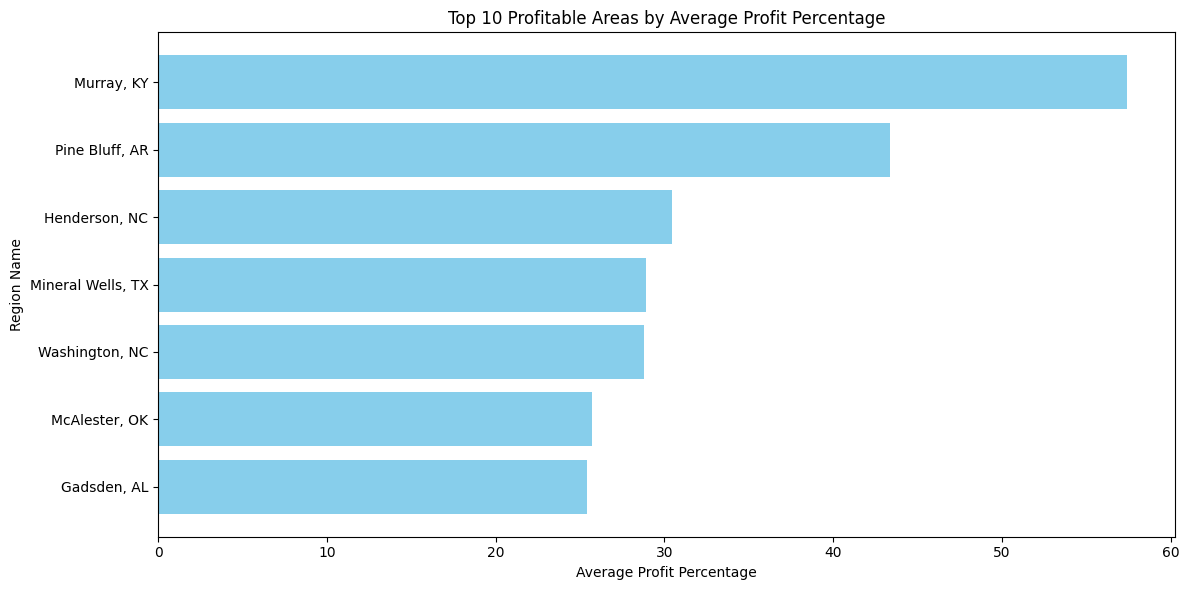

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure profitable_properties is defined
required_profit_percentage = 20  # Minimum profit percentage to include
profitable_properties = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


In [25]:
# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

print(f"Number of profitable areas: {len(area_summary)}")


Available columns: Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_

Available columns: Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_

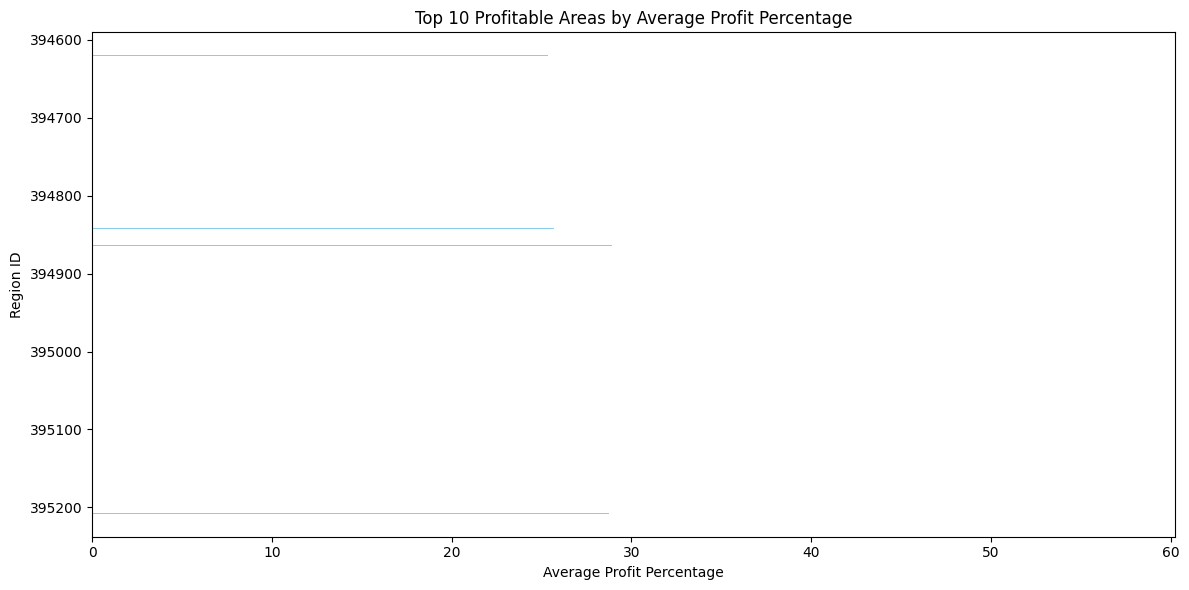

In [26]:
# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName"] if "RegionName" in grouping_columns else top_areas["RegionID"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name" if "RegionName" in grouping_columns else "Region ID")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


In [ ]:
print (profitable_properties)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjusted to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()
